In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.mlab import normpdf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Einext/data/master/50_Startups.csv")
print(data.info())
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB
None


,R&D Spend,Administration,Marketing Spend,State,Profit
22,73994.56,122782.75,303319.26,Florida,110352.25
7,130298.13,145530.06,323876.68,Florida,155752.60
0,165349.20,136897.80,471784.10,New York,192261.83
39,38558.51,82982.09,174999.30,California,81005.76
1,162597.70,151377.59,443898.53,California,191792.06
23,67532.53,105751.03,304768.73,Florida,108733.99
43,15505.73,127382.30,35534.17,New York,69758.98
15,114523.61,122616.84,261776.23,New York,129917.04
5,131876.90,99814.71,362861.36,New York,156991.12
45,1000.23,124153.04,1903.93,New York,64926.08


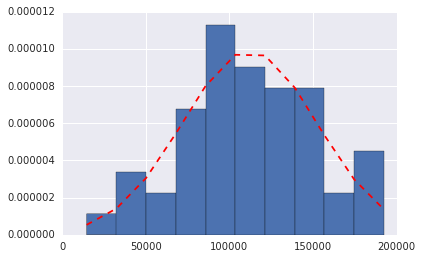

In [12]:
_, bins, _ = plt.hist(data.Profit, normed = True)

mean, std = data.Profit.mean(), data.Profit.std()
plt.plot(bins, normpdf(bins, mean, std), ls = "--", c = "red")


In [198]:
data1 = pd.get_dummies(data, columns=["State"], drop_first=True)
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


In [209]:
if "Profit" in data1.columns:
    y = data1["Profit"].values
    del data1["Profit"]
X = data1["R&D Spend"]
X.head()

0    165349.20
1    162597.70
2    153441.51
3    144372.41
4    142107.34
Name: R&D Spend, dtype: float64

In [210]:
print("Shape of X", X.shape, "shape of y", y.shape)

Shape of X (50,) shape of y (50,)


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y,
                                                    test_size = 0.3, random_state = 100)

In [214]:
print("Shape of X_train", X_train.shape, "shape of y_train", y_train.shape)

Shape of X_train (35, 1) shape of y_train (35,)


In [215]:
pd.DataFrame(X_train).head(10)

,0
0,64664.71
1,75328.87
2,46014.02
3,94657.16
4,130298.13
5,0.00
6,61136.38
7,63408.86
8,86419.70
9,78389.47


In [216]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [217]:
mse = mean_squared_error(y_test, lr.predict(X_test))
"MSE", mse, "rmse", np.sqrt(mse), "y-std", y_test.std()

('MSE',
 154134106.09876922,
 'rmse',
 12415.075758881587,
 'y-std',
 43373.80393742567)

In [218]:
y_test_pred = lr.predict(X_test)

In [219]:
pd.DataFrame({"actual": y_test, "pred": y_test_pred}).sample(10)

,actual,pred
7,96778.92,95321.224560
0,156122.51,164468.056895
3,103282.38,104547.824541
8,118474.03,113463.977600
5,14681.40,46823.276832
1,90708.19,71873.458594
10,192261.83,191327.260754
6,156991.12,162074.741232
4,69758.98,60374.232982
2,89949.14,85337.423536


In [224]:
lr.score(X_test, y_test) #calculates R2 score

0.91806985488478654

In [230]:
X1 = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

In [238]:
pd.DataFrame(X1).head(3)

,0,1
0,1.0,64664.71
1,1.0,75328.87
2,1.0,46014.02


In [234]:
from numpy.linalg import inv

In [237]:
inv(X1.T.dot(X1)).dot(X1.T).dot(y_train)

array([ 46823.27683,      0.87393])

In [222]:
print("Intercept: ", lr.intercept_, "coefs", lr.coef_)
#pd.DataFrame({"coef": lr.coef_, "column": X.columns})

Intercept:  46823.2768317 coefs [ 0.87393]


In [203]:
X.corr()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.205685,-0.033670
State_Florida,0.105711,0.010493,0.205685,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,-0.492366,1.000000


In [242]:
X_train_ss

array([[-0.31426],
       [-0.06344],
       [-0.75292],
       [ 0.39117],
       [ 1.22944],
       [-1.83517],
       [-0.39724],
       [-0.34379],
       [ 0.19742],
       [ 0.00855],
       [ 0.32849],
       [ 1.98912],
       [ 1.50719],
       [ 0.3725 ],
       [-0.1392 ],
       [-1.15887],
       [-0.09482],
       [-0.29213],
       [ 1.06566],
       [-0.0003 ],
       [-1.31355],
       [-1.82242],
       [-1.80423],
       [ 0.98589],
       [-1.17913],
       [ 1.77377],
       [-0.74323],
       [-0.37706],
       [ 0.56182],
       [ 0.85842],
       [-0.2468 ],
       [-0.92827],
       [ 1.56047],
       [-0.0231 ],
       [ 0.99999]])

thetas [ 115012.67229   37157.05077]


154134106.0988034

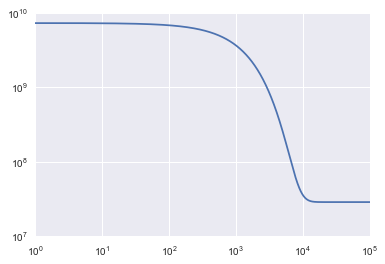

In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

def cost(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / y_true.shape[0]

def gradient_descent(X, y, learning_rate = 0.00001):
    X1 = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
    thetas = np.zeros(X1.shape[1])
    m = X1.shape[0]
    max_iters = 100000
    costs = []

    for iteration in range(max_iters):
        y_hat = X1.dot(thetas)
        errors = (y - y_hat)
        thetas = thetas + learning_rate * X1.T.dot(errors)
        cost = (errors ** 2).sum() / (2 * m)
        costs.append(cost)
    plt.plot(costs)
    plt.yscale("log")
    plt.xscale("log")
    
    print("thetas", thetas)
    return thetas
    
thetas = gradient_descent(X_train_ss, y_train)
cost(thetas[0] + X_test_ss.dot(thetas[1:]), y_test)

In [250]:
12415.075758881587, np.sqrt(154134106.09911057)

(12415.075758881587, 12415.075758895335)

In [253]:
from sklearn.linear_model import LassoCV, Lasso

In [269]:
data1 = pd.get_dummies(data, columns=["State"], drop_first=True)
if "Profit" in data1.columns:
    y = data1["Profit"].values
    del data1["Profit"]
X = data1
X_train, X_test, y_train, y_test = train_test_split(X.values, y,
                                                    test_size = 0.3, random_state = 100)
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


In [270]:
lassocv = LassoCV(cv=5, random_state=100, max_iter=10000, tol=1e-4)
lassocv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=100,
    selection='cyclic', tol=0.0001, verbose=False)

In [271]:
lassocv.alpha_

14224914.885828948

In [272]:
lassocv.coef_

array([ 0.81304, -0.     ,  0.02703, -0.     , -0.     ])

In [273]:
lasso = Lasso(alpha=lassocv.alpha_, max_iter=10000, random_state=100)
lasso.fit(X_ss, y)
lasso.coef_

array([ 0.,  0.,  0.,  0.,  0.])

In [ ]:
lass